In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
from scipy.signal import argrelextrema
import glob
plt.style.use(['science','nature','notebook'])

In [11]:
#my_path = os.path.abspath(r"C:\Users\KuChris\Desktop\osa\testmean")
#my_path = os.getcwd()
#part = '03_CRTMG850HY'
#part = '04_CRTTMG5C0AX'
#savepath = os.path.abspath(r'C:\Users\KuChris\Desktop\osa\{}'.format(part))
#joined_files = os.path.join(r"C:\Users\KuChris\Desktop\osa\01_CRTMFAE03U\datamean2", "*.csv")
#joined_files = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datamean2".format(part), "*.csv")
joined_files = os.path.join(r"C:\Users\KuChris\Desktop\osa\testmean", "*.csv")
joined_list = glob.glob(joined_files)

dfs = []
for file in joined_list:
    df = pd.read_csv(file)
    dfs.append(df)

In [4]:
plt.figure()
for s in range (len(dfs)):
    xx = dfs[s]['Frequency']
    yy = dfs[s]['MeanPower']
    #plt.figure()
    #plt.plot(xx,yy)

    dfs[s]['max'] = dfs[s]['MeanPower'][(dfs[s]['MeanPower'].shift(1) < dfs[s]['MeanPower']) & (dfs[s]['MeanPower'].shift(-1) < dfs[s]['MeanPower'])]
    dfs[s]['max'] = dfs[s].iloc[argrelextrema(dfs[s]['MeanPower'].values, np.greater_equal, order=10)[0]]['MeanPower']
    smsrs = dfs[s]['max'].dropna().nlargest(2).values[0]-dfs[s]['max'].dropna().nlargest(2).values[1]
    plt.scatter(xx, dfs[s]['max'], c='r')
    plt.plot(xx, dfs[s]['MeanPower'], label='Ch{} SMSR = {:.2f}'.format(s+1,smsrs))

    #plt.ylim([-60,20])
    plt.title('Spectrum for channel {}'.format(s+1))
    plt.xlabel('nm')
    plt.ylabel('dBm')

    #plt.legend(loc=2)#,prop={'size': 12})
    plt.tight_layout()

KeyError: 'MeanPower'

<Figure size 576x432 with 0 Axes>

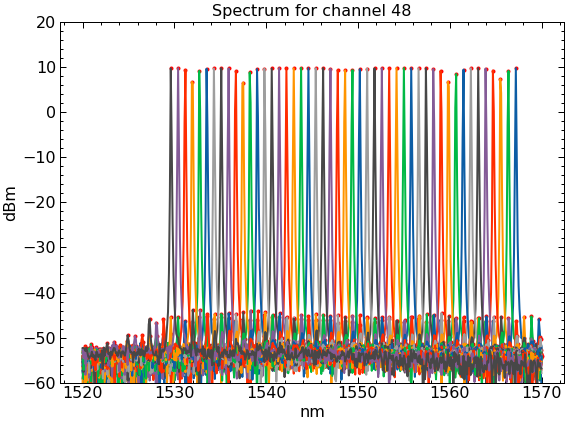

In [13]:
plt.figure()
for s in range (len(dfs)):
    xx = dfs[s]['Frequency']
    yy = dfs[s]['Power']
    #plt.figure()
    #plt.plot(xx,yy)

    dfs[s]['max'] = dfs[s]['Power'][(dfs[s]['Power'].shift(1) < dfs[s]['Power']) & (dfs[s]['Power'].shift(-1) < dfs[s]['Power'])]
    dfs[s]['max'] = dfs[s].iloc[argrelextrema(dfs[s]['Power'].values, np.greater_equal, order=10)[0]]['Power']
    smsrs = dfs[s]['max'].dropna().nlargest(2).values[0]-dfs[s]['max'].dropna().nlargest(2).values[1]
    plt.scatter(xx, dfs[s]['max'], c='r')
    plt.plot(xx, dfs[s]['Power'], label='Ch{} SMSR = {:.2f}'.format(s+1,smsrs))

    plt.ylim([-60,20])
    plt.title('Spectrum for channel {}'.format(s+1))
    plt.xlabel('nm')
    plt.ylabel('dBm')

    #plt.legend(loc=2)#,prop={'size': 12})
    plt.tight_layout()

In [ ]:
s = 0
xx = dfs[s]['Frequency']
yy = dfs[s]['MeanPower']
#plt.figure()
#plt.plot(xx,yy)

dfs[s]['max'] = dfs[s]['MeanPower'][(dfs[s]['MeanPower'].shift(1) < dfs[s]['MeanPower']) & (dfs[s]['MeanPower'].shift(-1) < dfs[s]['MeanPower'])]
dfs[s]['max'] = dfs[s].iloc[argrelextrema(dfs[s]['MeanPower'].values, np.greater_equal, order=10)[0]]['MeanPower']
smsrs = dfs[s]['max'].dropna().nlargest(2).values[0]-dfs[s]['max'].dropna().nlargest(2).values[1]

powervalue = dfs[s]['MeanPower'].max()

plt.figure()
plt.scatter(xx, dfs[s]['max'], c='r')
plt.plot(xx, dfs[s]['MeanPower'], label='Ch{} SMSR = {:.2f} Power = {:.2f}'.format(s+1,smsrs,powervalue))

#plt.ylim([-60,20])
plt.title('Spectrum for channel {}'.format(s+1))
plt.xlabel('nm')
plt.ylabel('dBm')

plt.legend(loc=2)#,prop={'size': 12})
plt.tight_layout()



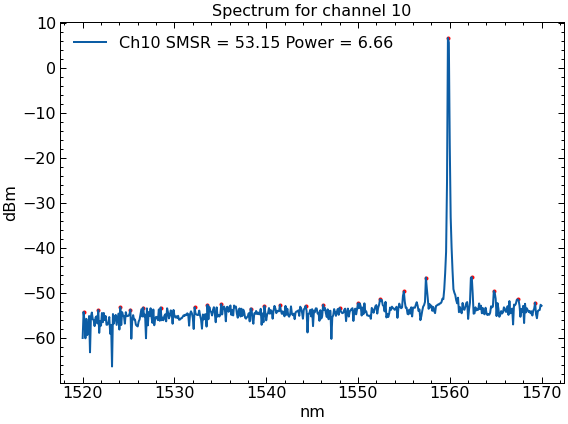

In [20]:
s = 9
xx = dfs[s]['Frequency']
yy = dfs[s]['Power']
#plt.figure()
#plt.plot(xx,yy)

dfs[s]['max'] = dfs[s]['Power'][(dfs[s]['Power'].shift(1) < dfs[s]['Power']) & (dfs[s]['Power'].shift(-1) < dfs[s]['Power'])]
dfs[s]['max'] = dfs[s].iloc[argrelextrema(dfs[s]['Power'].values, np.greater_equal, order=10)[0]]['Power']
smsrs = dfs[s]['max'].dropna().nlargest(2).values[0]-dfs[s]['max'].dropna().nlargest(2).values[1]

powervalue = dfs[s]['Power'].max()

plt.figure()
plt.scatter(xx, dfs[s]['max'], c='r')
plt.plot(xx, dfs[s]['Power'], label='Ch{} SMSR = {:.2f} Power = {:.2f}'.format(s+1,smsrs,powervalue))

#plt.ylim([-60,20])
#plt.xlim([1560,1570])
plt.title('Spectrum for channel {}'.format(s+1))
plt.xlabel('nm')
plt.ylabel('dBm')

plt.legend(loc=2)#,prop={'size': 12})
plt.tight_layout()

In [ ]:
##SP
smsr = []
plt.figure(dpi=120)
for n in range (0,47):
    x = dfs[n]['Frequency']
    y = dfs[n]['MeanPower']
    plt.plot(x,y)
    plt.ylim(-60,14)
    dfs[n]['max'] = dfs[n]['MeanPower'][(dfs[n]['MeanPower'].shift(1) < dfs[n]['MeanPower']) & (dfs[n]['MeanPower'].shift(-1) < dfs[n]['MeanPower'])]
    dfs[n]['max'] = dfs[n].iloc[argrelextrema(dfs[n]['MeanPower'].values, np.greater_equal, order=10)[0]]['MeanPower']
    smsrvalue = dfs[n]['max'].dropna().nlargest(2).values[0]-dfs[n]['max'].dropna().nlargest(2).values[1]
    smsr.append(smsrvalue)
plt.title('Spectrum for 48 channels')
plt.xlabel('nm')
plt.ylabel('dBm')
plt.tight_layout()
#plt.savefig(os.path.join(savepath, '{}_meanpm.png'.format(part)))

##SMSR
plt.figure(dpi=120)
plt.plot(np.arange(len(smsr)),smsr)
plt.scatter(np.arange(len(smsr)),smsr, c='r')
plt.title('SMSR vs 48 channels')
plt.xlabel('Channel')
plt.ylabel('dBm')
plt.tight_layout()
#plt.savefig(os.path.join(savepath, '{}_SMSRpm.png'.format(part)))

##power
powermax= []
for n in range(0,47):
    powervalue = dfs[n]['MeanPower'].max()
    powermax.append(powervalue)

plt.figure(dpi=120)
plt.plot(np.arange(len(powermax)), powermax)
plt.scatter(np.arange(len(powermax)), powermax, c='r')
plt.title('Max Power vs 48 channels')
plt.xlabel('Channel')
plt.ylabel('dBm')
plt.tight_layout()
#plt.savefig(os.path.join(savepath, '{}_powerpm.png'.format(part)))

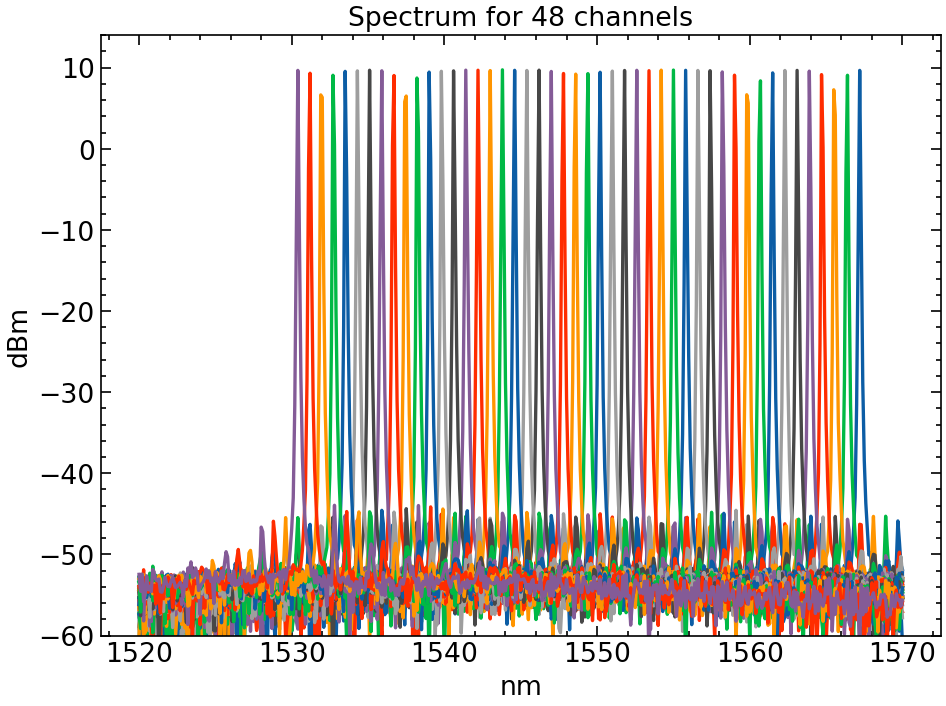

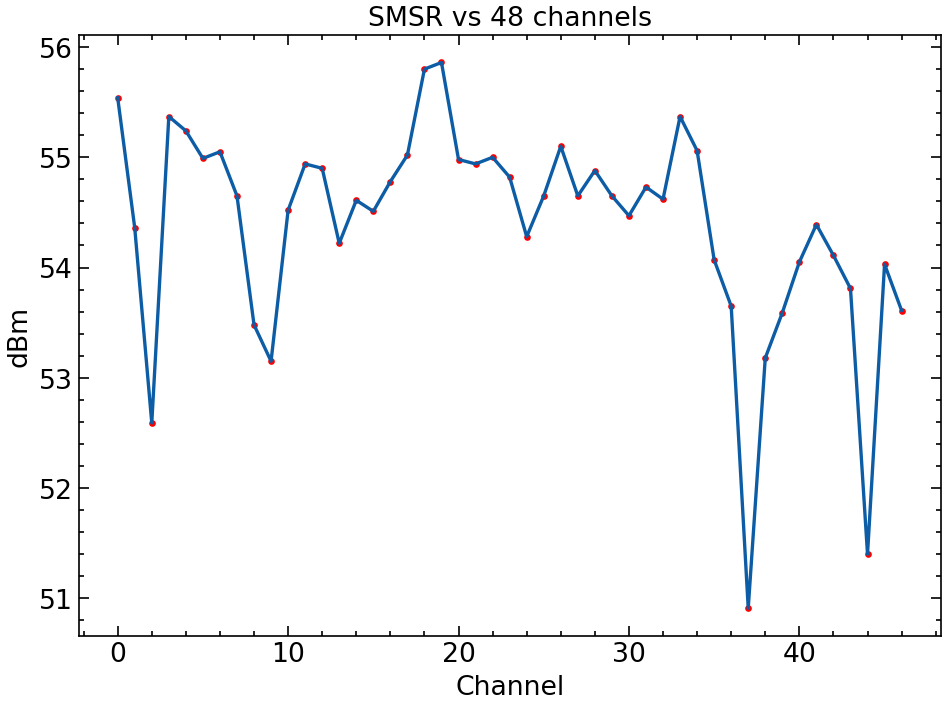

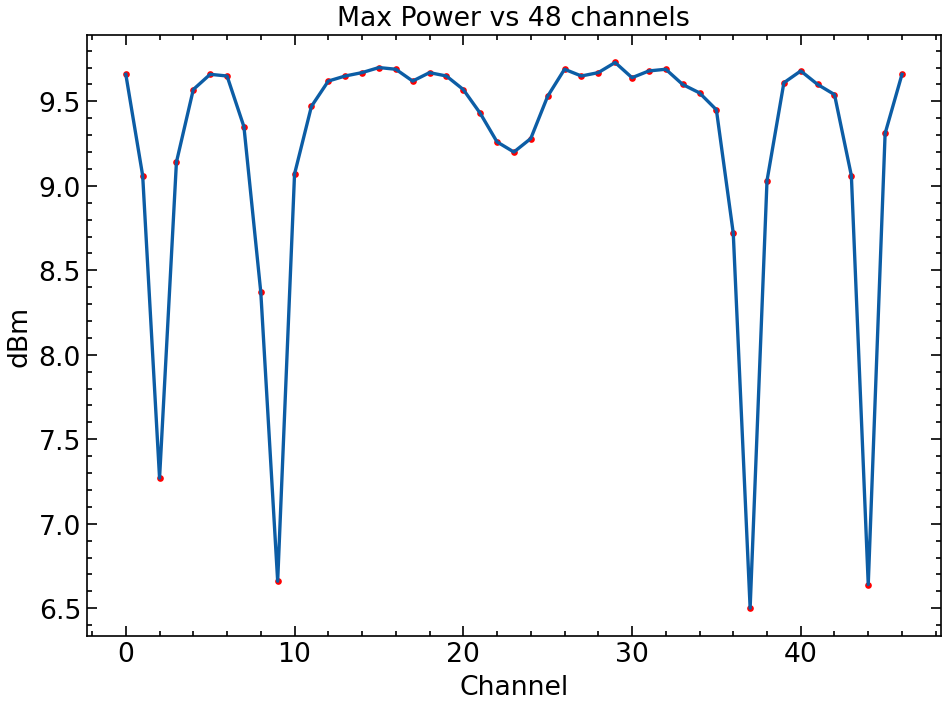

In [17]:
##SP
smsr = []
plt.figure(dpi=120)
for n in range (0,47):
    x = dfs[n]['Frequency']
    y = dfs[n]['Power']
    plt.plot(x,y)
    plt.ylim(-60,14)
    dfs[n]['max'] = dfs[n]['Power'][(dfs[n]['Power'].shift(1) < dfs[n]['Power']) & (dfs[n]['Power'].shift(-1) < dfs[n]['Power'])]
    dfs[n]['max'] = dfs[n].iloc[argrelextrema(dfs[n]['Power'].values, np.greater_equal, order=10)[0]]['Power']
    smsrvalue = dfs[n]['max'].dropna().nlargest(2).values[0]-dfs[n]['max'].dropna().nlargest(2).values[1]
    smsr.append(smsrvalue)
plt.title('Spectrum for 48 channels')
plt.xlabel('nm')
plt.ylabel('dBm')
plt.tight_layout()
#plt.savefig(os.path.join(savepath, '{}_meanpm.png'.format(part)))

##SMSR
plt.figure(dpi=120)
plt.plot(np.arange(len(smsr)),smsr)
plt.scatter(np.arange(len(smsr)),smsr, c='r')
plt.title('SMSR vs 48 channels')
plt.xlabel('Channel')
plt.ylabel('dBm')
plt.tight_layout()
#plt.savefig(os.path.join(savepath, '{}_SMSRpm.png'.format(part)))

##power
powermax= []
for n in range(0,47):
    powervalue = dfs[n]['Power'].max()
    powermax.append(powervalue)

plt.figure(dpi=120)
plt.plot(np.arange(len(powermax)), powermax)
plt.scatter(np.arange(len(powermax)), powermax, c='r')
plt.title('Max Power vs 48 channels')
plt.xlabel('Channel')
plt.ylabel('dBm')
plt.tight_layout()
#plt.savefig(os.path.join(savepath, '{}_powerpm.png'.format(part)))

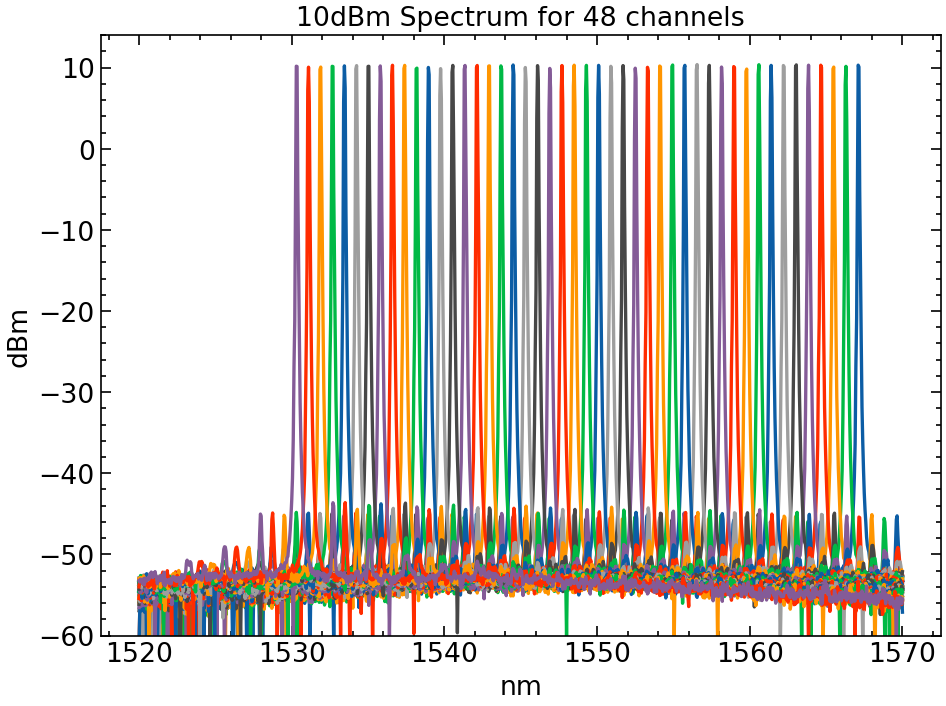

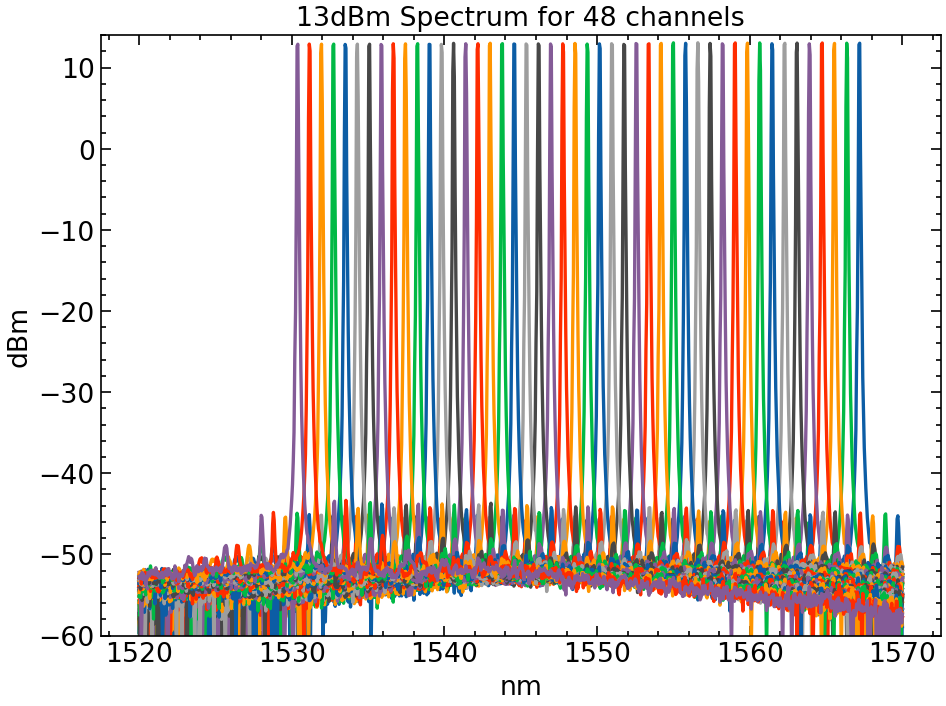

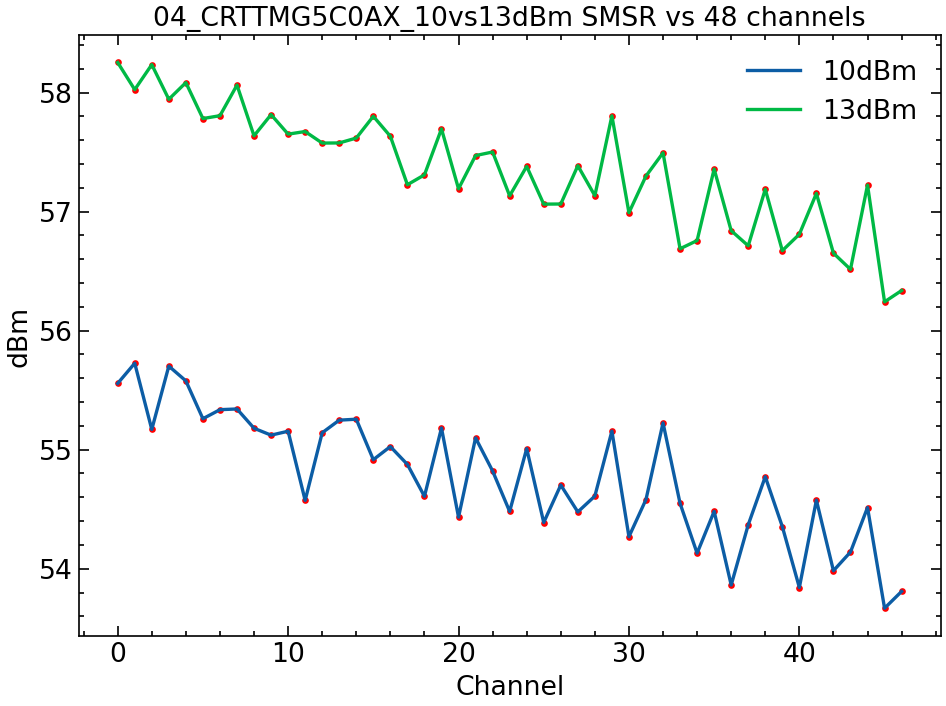

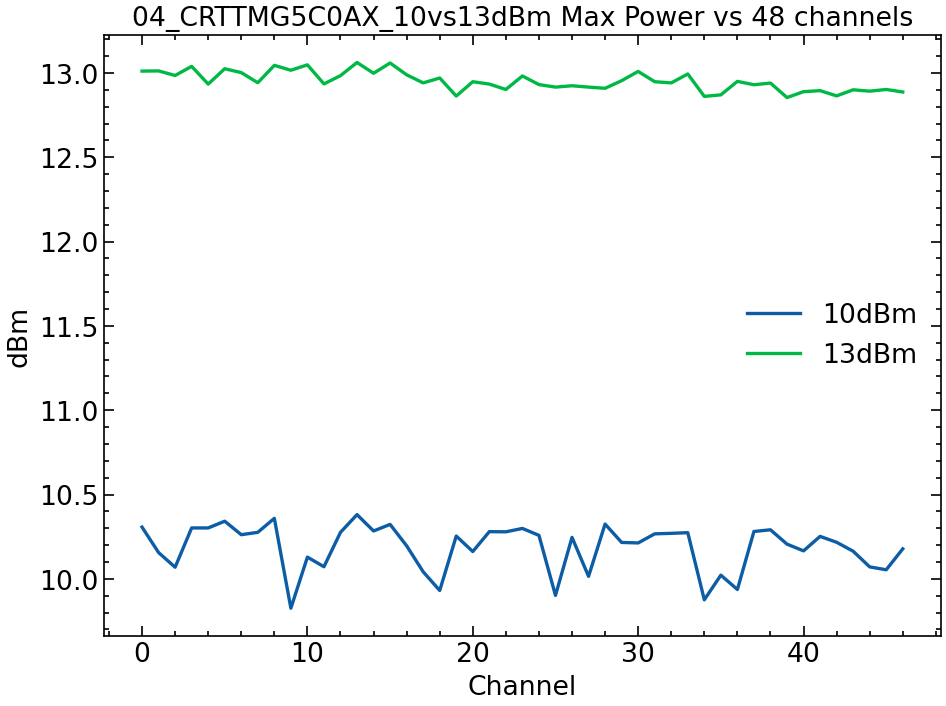

In [16]:
#part1='01_CRTMFAE03U'
#part='02_CRTMG7V01Q'
#part3='03_CRTMG850HY'
part='04_CRTTMG5C0AX'
savepath = os.path.abspath(r'C:\Users\KuChris\Desktop\osa\{}'.format(part))

joined_files1 = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datamean3".format(part), "*.csv")
joined_list1 = glob.glob(joined_files1)

joined_files2 = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datapslowmean13dbm".format(part), "*.csv")
joined_list2 = glob.glob(joined_files2)

dfs = []
for file in joined_list1:
    df = pd.read_csv(file)
    dfs.append(df)

dfs2 = []
for file in joined_list2:
    df = pd.read_csv(file)
    dfs2.append(df)

#1
smsr1 = []
plt.figure(dpi=120)
for n in range (0,47):
    x = dfs[n]['Frequency']
    y = dfs[n]['MeanPower']
    plt.plot(x,y)
    plt.ylim(-60,14)
    dfs[n]['max'] = dfs[n]['MeanPower'][(dfs[n]['MeanPower'].shift(1) < dfs[n]['MeanPower']) & (dfs[n]['MeanPower'].shift(-1) < dfs[n]['MeanPower'])]
    dfs[n]['max'] = dfs[n].iloc[argrelextrema(dfs[n]['MeanPower'].values, np.greater_equal, order=10)[0]]['MeanPower']
    smsrvalue = dfs[n]['max'].dropna().nlargest(2).values[0]-dfs[n]['max'].dropna().nlargest(2).values[1]
    smsr1.append(smsrvalue)
plt.title('10dBm Spectrum for 48 channels')
plt.xlabel('nm')
plt.ylabel('dBm')
plt.tight_layout()
#plt.savefig(os.path.join(savepath, '{}_MS9710B_mean.png'.format(part)))

#2
smsr2=[]
plt.figure(dpi=120)
for n in range (0,47):
    x2 = dfs2[n]['Frequency']
    y2 = dfs2[n]['MeanPower']
    plt.plot(x2,y2)
    plt.ylim(-60,14)
    dfs2[n]['max'] = dfs2[n]['MeanPower'][(dfs2[n]['MeanPower'].shift(1) < dfs2[n]['MeanPower']) & (dfs2[n]['MeanPower'].shift(-1) < dfs2[n]['MeanPower'])]
    dfs2[n]['max'] = dfs2[n].iloc[argrelextrema(dfs2[n]['MeanPower'].values, np.greater_equal, order=10)[0]]['MeanPower']
    smsrvalue2 = dfs2[n]['max'].dropna().nlargest(2).values[0]-dfs2[n]['max'].dropna().nlargest(2).values[1]
    smsr2.append(smsrvalue2)
plt.title('13dBm Spectrum for 48 channels')
plt.xlabel('nm')
plt.ylabel('dBm')
plt.tight_layout()
#plt.savefig(os.path.join(savepath, '{}_MS9740A_mean.png'.format(part)))


plt.figure(dpi=120)
plt.plot(np.arange(len(smsr1)),smsr1, label = '10dBm')
plt.scatter(np.arange(len(smsr1)),smsr1, c='r')

plt.plot(np.arange(len(smsr2)),smsr2, label = '13dBm')
plt.scatter(np.arange(len(smsr2)),smsr2, c='r')

plt.title('{}_10vs13dBm SMSR vs 48 channels'.format(part))
plt.xlabel('Channel')
plt.ylabel('dBm')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(savepath, '{}_10vs13dbm_SMSR.png'.format(part)))

powermax= []
powermax2= []
for n in range(0,47):
    powervalue = dfs[n]['MeanPower'].max()
    powermax.append(powervalue)

    powervalue2 = dfs2[n]['MeanPower'].max()
    powermax2.append(powervalue2)

plt.figure(dpi=120)
plt.plot(np.arange(len(powermax)), powermax, label = '10dBm')
plt.plot(np.arange(len(powermax2)), powermax2, label = '13dBm')

plt.title('{}_10vs13dBm Max Power vs 48 channels'.format(part))
plt.xlabel('Channel')
plt.ylabel('dBm')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(savepath, '{}_10vs13dbm_power.png'.format(part)))

In [ ]:
from scipy import integrate

mwd= []
for n in range (len(dfs[0])):
    mwvalue = 10**((dfs[0]['MeanPower'][n])/10.)/(0.152)
    mwd.append(mwvalue)

#mwd = [i for i in mwd if i > 1]
plt.plot(x2,mwd)

psd = integrate.simps(mwd, dx=0.098, even='avg')
psddbm = 10.*np.log10(psd)
psddbm,psd

In [ ]:
part1='01_CRTMFAE03U'
part2='02_CRTMG7V01Q'
part3='03_CRTMG850HY'
part4='04_CRTTMG5C0AX'

savepath = os.path.abspath(r'C:\Users\KuChris\Desktop\osa')

joined_files1 = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datamean3".format(part1), "*.csv")
joined_list1 = glob.glob(joined_files1)

joined_files2 = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datamean2".format(part2), "*.csv")
joined_list2 = glob.glob(joined_files2)

joined_files3 = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datamean2".format(part3), "*.csv")
joined_list3 = glob.glob(joined_files3)

joined_files4 = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datamean3".format(part4), "*.csv")
joined_list4 = glob.glob(joined_files4)

dfs = []
for file in joined_list1:
    df = pd.read_csv(file)
    dfs.append(df)

dfs2 = []
for file in joined_list2:
    df = pd.read_csv(file)
    dfs2.append(df)

dfs3 = []
for file in joined_list3:
    df = pd.read_csv(file)
    dfs3.append(df)

dfs4 = []
for file in joined_list4:
    df = pd.read_csv(file)
    dfs4.append(df)

#1
smsr1 = []
plt.figure(dpi=120)
for n in range (0,47):
    x = dfs[n]['Frequency']
    y = dfs[n]['MeanPower']
    plt.plot(x,y)
    plt.ylim(-60,14)
    dfs[n]['max'] = dfs[n]['MeanPower'][(dfs[n]['MeanPower'].shift(1) < dfs[n]['MeanPower']) & (dfs[n]['MeanPower'].shift(-1) < dfs[n]['MeanPower'])]
    dfs[n]['max'] = dfs[n].iloc[argrelextrema(dfs[n]['MeanPower'].values, np.greater_equal, order=10)[0]]['MeanPower']
    smsrvalue = dfs[n]['max'].dropna().nlargest(2).values[0]-dfs[n]['max'].dropna().nlargest(2).values[1]
    smsr1.append(smsrvalue)
plt.title('{} Spectrum for 48 channels'.format(part1))
plt.xlabel('nm')
plt.ylabel('dBm')
plt.tight_layout()
#plt.savefig(os.path.join(savepath, '{}_mean.png'.format(part1)))

#2
smsr2=[]
plt.figure(dpi=120)
for n in range (0,47):
    x2 = dfs2[n]['Frequency']
    y2 = dfs2[n]['MeanPower']
    plt.plot(x2,y2)
    plt.ylim(-60,14)
    dfs2[n]['max'] = dfs2[n]['MeanPower'][(dfs2[n]['MeanPower'].shift(1) < dfs2[n]['MeanPower']) & (dfs2[n]['MeanPower'].shift(-1) < dfs2[n]['MeanPower'])]
    dfs2[n]['max'] = dfs2[n].iloc[argrelextrema(dfs2[n]['MeanPower'].values, np.greater_equal, order=10)[0]]['MeanPower']
    smsrvalue2 = dfs2[n]['max'].dropna().nlargest(2).values[0]-dfs2[n]['max'].dropna().nlargest(2).values[1]
    smsr2.append(smsrvalue2)
plt.title('{} Spectrum for 48 channels'.format(part2))
plt.xlabel('nm')
plt.ylabel('dBm')
plt.tight_layout()
#plt.savefig(os.path.join(savepath, '{}__mean.png'.format(part2)))

#3
smsr3=[]
plt.figure(dpi=120)
for n in range (0,47):
    x2 = dfs3[n]['Frequency']
    y2 = dfs3[n]['MeanPower']
    plt.plot(x2,y2)
    plt.ylim(-60,14)
    dfs3[n]['max'] = dfs3[n]['MeanPower'][(dfs3[n]['MeanPower'].shift(1) < dfs3[n]['MeanPower']) & (dfs3[n]['MeanPower'].shift(-1) < dfs3[n]['MeanPower'])]
    dfs3[n]['max'] = dfs3[n].iloc[argrelextrema(dfs3[n]['MeanPower'].values, np.greater_equal, order=10)[0]]['MeanPower']
    smsrvalue3 = dfs3[n]['max'].dropna().nlargest(2).values[0]-dfs3[n]['max'].dropna().nlargest(2).values[1]
    smsr3.append(smsrvalue3)
plt.title('{} Spectrum for 48 channels'.format(part3))
plt.xlabel('nm')
plt.ylabel('dBm')
plt.tight_layout()
#plt.savefig(os.path.join(savepath, '{}__mean.png'.format(part3)))

#4
smsr4=[]
plt.figure(dpi=120)
for n in range (0,47):
    x2 = dfs4[n]['Frequency']
    y2 = dfs4[n]['MeanPower']
    plt.plot(x2,y2)
    plt.ylim(-60,14)
    dfs4[n]['max'] = dfs4[n]['MeanPower'][(dfs4[n]['MeanPower'].shift(1) < dfs4[n]['MeanPower']) & (dfs4[n]['MeanPower'].shift(-1) < dfs4[n]['MeanPower'])]
    dfs4[n]['max'] = dfs4[n].iloc[argrelextrema(dfs4[n]['MeanPower'].values, np.greater_equal, order=10)[0]]['MeanPower']
    smsrvalue4 = dfs4[n]['max'].dropna().nlargest(2).values[0]-dfs4[n]['max'].dropna().nlargest(2).values[1]
    smsr4.append(smsrvalue4)
plt.title('{} Spectrum for 48 channels'.format(part4))
plt.xlabel('nm')
plt.ylabel('dBm')
plt.tight_layout()
#plt.savefig(os.path.join(savepath, '{}__mean.png'.format(part4)))

#all
plt.figure(dpi=120)
plt.plot(np.arange(len(smsr1)),smsr1, label = part1)
plt.scatter(np.arange(len(smsr1)),smsr1, c='r')

plt.plot(np.arange(len(smsr2)),smsr2, label = part2)
plt.scatter(np.arange(len(smsr2)),smsr2, c='r')

plt.plot(np.arange(len(smsr3)),smsr3, label = part3)
plt.scatter(np.arange(len(smsr3)),smsr3, c='r')

plt.plot(np.arange(len(smsr4)),smsr4, label = part4)
plt.scatter(np.arange(len(smsr4)),smsr4, c='r')

plt.title('SMSR vs 48 channels')
plt.xlabel('Channel')
plt.ylabel('dBm')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(savepath, 'all_SMSR.png'))

powermax= []
powermax2= []
powermax3= []
powermax4= []
for n in range(0,47):
    powervalue = dfs[n]['MeanPower'].max()
    powermax.append(powervalue)

    powervalue2 = dfs2[n]['MeanPower'].max()
    powermax2.append(powervalue2)

    powervalue3 = dfs3[n]['MeanPower'].max()
    powermax3.append(powervalue3)

    powervalue4 = dfs4[n]['MeanPower'].max()
    powermax4.append(powervalue4)

plt.figure(dpi=120)
plt.plot(np.arange(len(powermax)), powermax, label = part1)
plt.plot(np.arange(len(powermax2)), powermax2, label = part2)
plt.plot(np.arange(len(powermax3)), powermax3, label = part3)
plt.plot(np.arange(len(powermax4)), powermax4, label = part4)

plt.title('Max Power vs 48 channels')
plt.xlabel('Channel')
plt.ylabel('dBm')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(savepath, 'all_power.png'))

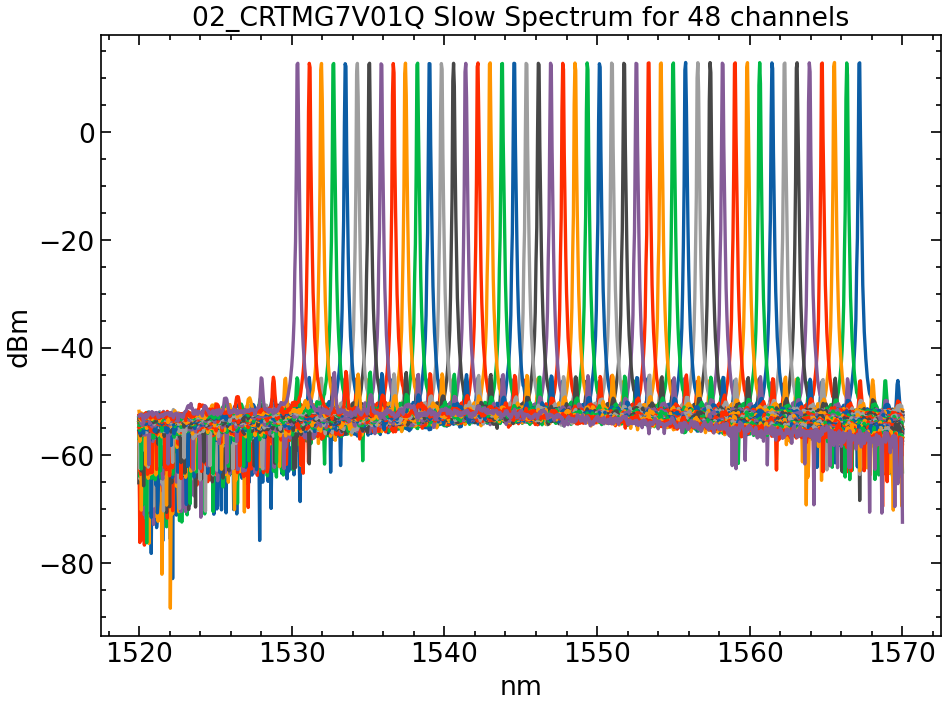

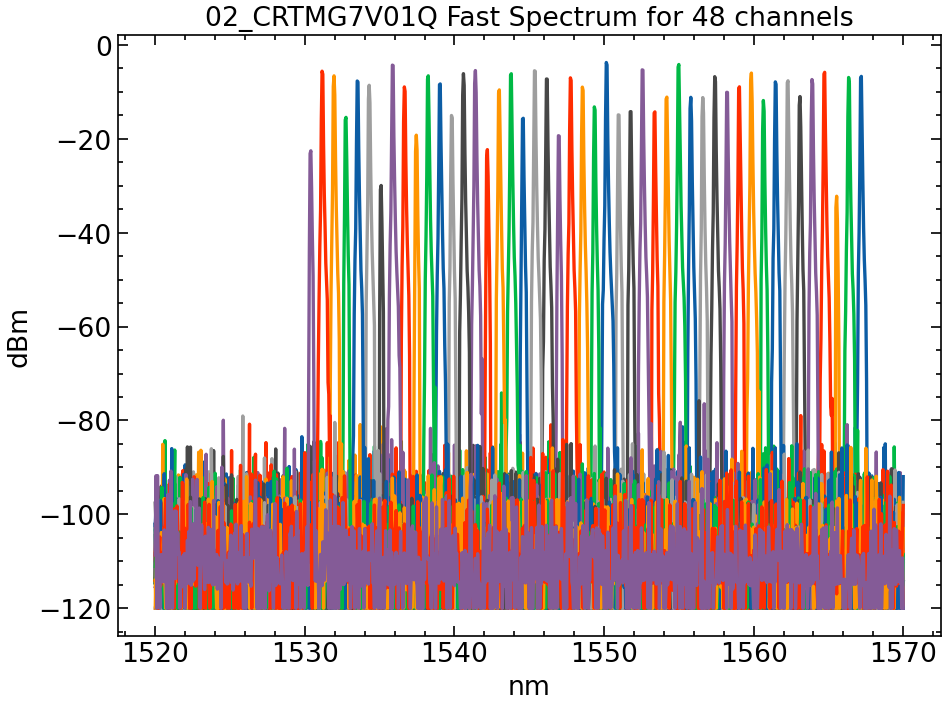

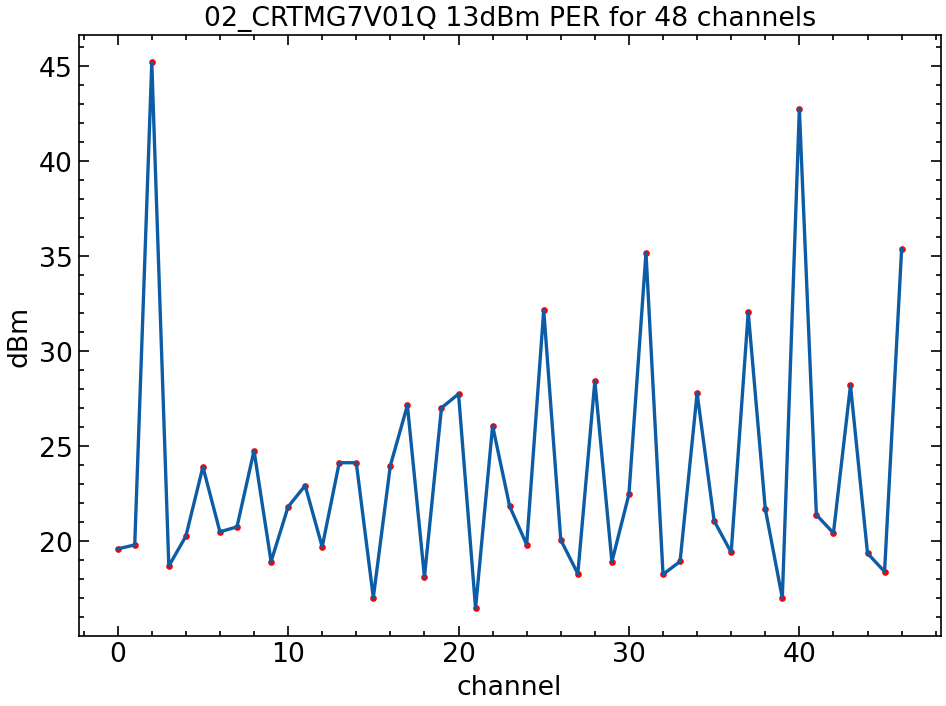

In [13]:
##Polarization
#part='01_CRTMFAE03U'
part='02_CRTMG7V01Q'
#part='03_CRTMG850HY'
#part='04_CRTTMG5C0AX'

savepath = os.path.abspath(r'C:\Users\KuChris\Desktop\osa\{}'.format(part))

#joined_files1 = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datamean3".format(part), "*.csv")
joined_files1 = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datapslowmean13dbm".format(part), "*.csv")
joined_list1 = glob.glob(joined_files1)

joined_files2 = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datapfastmean13dbm".format(part), "*.csv")
joined_list2 = glob.glob(joined_files2)

# #test
# joined_files3 = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datamean3".format(part), "*.csv")
# joined_list3 = glob.glob(joined_files3)

dfs = []
for file in joined_list1:
    df = pd.read_csv(file)
    dfs.append(df)

dfs2 = []
for file in joined_list2:
    df = pd.read_csv(file)
    dfs2.append(df)

# dfs3 = []
# for file in joined_list3:
#     df = pd.read_csv(file)
#     dfs3.append(df)

#slow
plt.figure(dpi=120)
for n in range (0,47):
    xs = dfs[n]['Frequency']
    ys = dfs[n]['MeanPower']
    plt.plot(xs,ys)
plt.title('{} Slow Spectrum for 48 channels'.format(part))
plt.xlabel('nm')
plt.ylabel('dBm')
plt.tight_layout()
#plt.savefig(os.path.join(savepath, '{}_mean.png'.format(part1)))

#fast
plt.figure(dpi=120)
for n in range (0,47):
    xf = dfs2[n]['Frequency']
    yf = dfs2[n]['MeanPower']
    plt.plot(xf,yf)
plt.title('{} Fast Spectrum for 48 channels'.format(part))
plt.xlabel('nm')
plt.ylabel('dBm')
plt.tight_layout()
#plt.savefig(os.path.join(savepath, '{}_fastaxis_mean.png'.format(part)))

#Polarization Extinction Ratio PER
powermaxs= []
powermaxf= []
powermaxper= []
#
# powermaxper2= []

for n in range(0,47):
    powervalues = dfs[n]['MeanPower'].max()
    powermaxs.append(powervalues)

    powervaluef = dfs2[n]['MeanPower'].max()
    powermaxf.append(powervaluef)

    powervalueper = dfs[n]['MeanPower'].max() - dfs2[n]['MeanPower'].max()
    powermaxper.append(powervalueper)

    # powervalueper2 = dfs3[n]['MeanPower'].max() - dfs2[n]['MeanPower'].max()
    # powermaxper2.append(powervalueper2)

plt.figure(dpi=120)
plt.scatter(np.arange(len(powermaxper)), powermaxper, c='r')
plt.plot(np.arange(len(powermaxper)), powermaxper, label = '13dbm PER')

# plt.scatter(np.arange(len(powermaxper2)), powermaxper2, c='r')
# plt.plot(np.arange(len(powermaxper2)), powermaxper2, label = 'PER, one')

plt.title('{} 13dBm PER for 48 channels'.format(part))
plt.xlabel('channel')
plt.ylabel('dBm')
# plt.legend()
plt.tight_layout()
#plt.savefig(os.path.join(savepath, '{}_PER_mean.png'.format(part)))

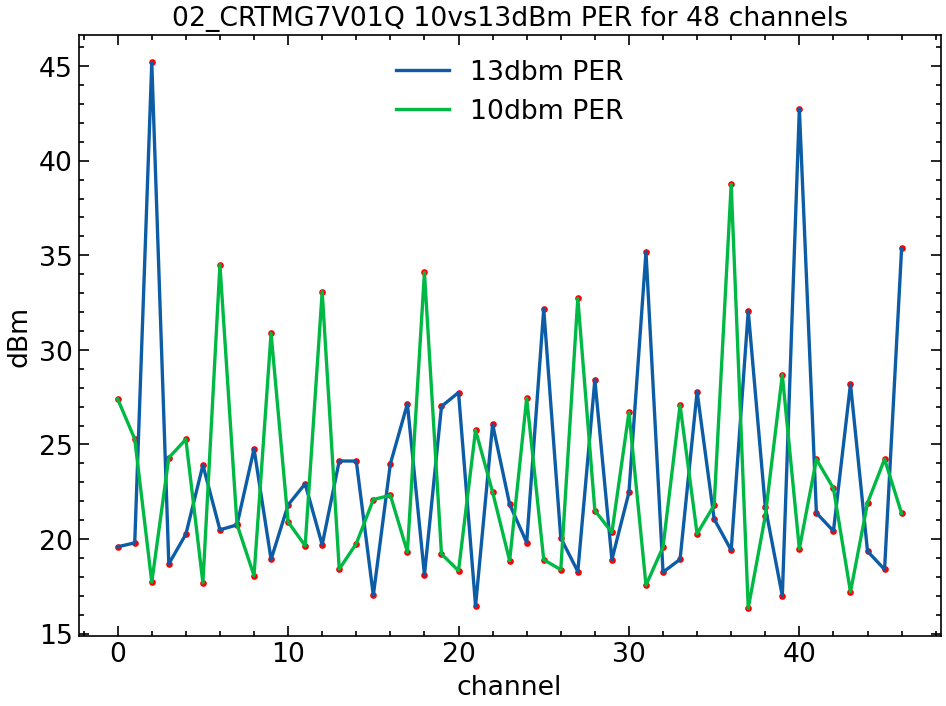

In [14]:
##Polarization
#part='01_CRTMFAE03U'
part='02_CRTMG7V01Q'
#part='03_CRTMG850HY'
#part='04_CRTTMG5C0AX'

savepath = os.path.abspath(r'C:\Users\KuChris\Desktop\osa\{}'.format(part))

#joined_files1 = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datamean3".format(part), "*.csv")
joined_files1 = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datapslowmean13dbm".format(part), "*.csv")
joined_list1 = glob.glob(joined_files1)

joined_files2 = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datapfastmean13dbm".format(part), "*.csv")
joined_list2 = glob.glob(joined_files2)

joined_files11 = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datamean2".format(part), "*.csv")
joined_list11 = glob.glob(joined_files11)

joined_files21 = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datapfastmean".format(part), "*.csv")
joined_list21 = glob.glob(joined_files21)



dfs = []
for file in joined_list1:
    df = pd.read_csv(file)
    dfs.append(df)

dfs2 = []
for file in joined_list2:
    df = pd.read_csv(file)
    dfs2.append(df)

dfsb = []
for file in joined_list11:
    df = pd.read_csv(file)
    dfsb.append(df)

dfsb2 = []
for file in joined_list21:
    df = pd.read_csv(file)
    dfsb2.append(df)



#slow
# plt.figure(dpi=120)
# for n in range (0,47):
#     xs = dfs[n]['Frequency']
#     ys = dfs[n]['MeanPower']
#     plt.plot(xs,ys)
# plt.title('{} Slow Spectrum for 48 channels'.format(part))
# plt.xlabel('nm')
# plt.ylabel('dBm')
# plt.tight_layout()
#plt.savefig(os.path.join(savepath, '{}_mean.png'.format(part1)))

#fast
# plt.figure(dpi=120)
# for n in range (0,47):
#     xf = dfs2[n]['Frequency']
#     yf = dfs2[n]['MeanPower']
#     plt.plot(xf,yf)
# plt.title('{} Fast Spectrum for 48 channels'.format(part))
# plt.xlabel('nm')
# plt.ylabel('dBm')
# plt.tight_layout()
#plt.savefig(os.path.join(savepath, '{}_fastaxis_mean.png'.format(part)))

#Polarization Extinction Ratio PER
powermaxs= []
powermaxf= []
powermaxper= []

powermaxsb= []
powermaxfb= []
powermaxperb= []
#
# powermaxper2= []

for n in range(0,47):
    powervalues = dfs[n]['MeanPower'].max()
    powermaxs.append(powervalues)

    powervaluef = dfs2[n]['MeanPower'].max()
    powermaxf.append(powervaluef)

    powervalueper = dfs[n]['MeanPower'].max() - dfs2[n]['MeanPower'].max()
    powermaxper.append(powervalueper)

for n in range(0,47):
    powervaluesb = dfsb[n]['MeanPower'].max()
    powermaxsb.append(powervaluesb)

    powervaluefb = dfsb2[n]['MeanPower'].max()
    powermaxfb.append(powervaluefb)

    powervalueperb = dfsb[n]['MeanPower'].max() - dfsb2[n]['MeanPower'].max()
    powermaxperb.append(powervalueperb)

plt.figure(dpi=120)
plt.scatter(np.arange(len(powermaxper)), powermaxper, c='r')
plt.plot(np.arange(len(powermaxper)), powermaxper, label = '13dbm PER')

plt.scatter(np.arange(len(powermaxperb)), powermaxperb, c='r')
plt.plot(np.arange(len(powermaxperb)), powermaxperb, label = '10dbm PER')

plt.title('{} 10vs13dBm PER for 48 channels'.format(part))
plt.xlabel('channel')
plt.ylabel('dBm')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(savepath, '{}_10vs13dbm_PER_mean.png'.format(part)))

In [ ]:
##Polarization
part1='01_CRTMFAE03U'
part2='02_CRTMG7V01Q'
part3='03_CRTMG850HY'
part4='04_CRTTMG5C0AX'

savepath = os.path.abspath(r'C:\Users\KuChris\Desktop\osa')
#1
joined_files11 = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datamean3".format(part1), "*.csv")
joined_list11 = glob.glob(joined_files11)

joined_files12 = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datapfastmean".format(part1), "*.csv")
joined_list12 = glob.glob(joined_files12)
#2
joined_files21 = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datamean2".format(part2), "*.csv")
joined_list21 = glob.glob(joined_files21)

joined_files22 = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datapfastmean".format(part2), "*.csv")
joined_list22 = glob.glob(joined_files22)
#3
joined_files31 = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datamean2".format(part3), "*.csv")
joined_list31 = glob.glob(joined_files31)

joined_files32 = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datapfastmean".format(part3), "*.csv")
joined_list32 = glob.glob(joined_files32)
#4
joined_files41 = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datamean3".format(part4), "*.csv")
joined_list41 = glob.glob(joined_files41)

joined_files42 = os.path.join(r"C:\Users\KuChris\Desktop\osa\{}\datapfastmean".format(part4), "*.csv")
joined_list42 = glob.glob(joined_files42)


dfs11 = []
for file in joined_list11:
    df = pd.read_csv(file)
    dfs11.append(df)

dfs12 = []
for file in joined_list12:
    df = pd.read_csv(file)
    dfs12.append(df)

dfs21 = []
for file in joined_list21:
    df = pd.read_csv(file)
    dfs21.append(df)

dfs22 = []
for file in joined_list22:
    df = pd.read_csv(file)
    dfs22.append(df)

dfs31 = []
for file in joined_list31:
    df = pd.read_csv(file)
    dfs31.append(df)

dfs32 = []
for file in joined_list32:
    df = pd.read_csv(file)
    dfs32.append(df)

dfs41 = []
for file in joined_list41:
    df = pd.read_csv(file)
    dfs41.append(df)

dfs42 = []
for file in joined_list42:
    df = pd.read_csv(file)
    dfs42.append(df)

# dfs3 = []
# for file in joined_list3:
#     df = pd.read_csv(file)
#     dfs3.append(df)

# #slow
# plt.figure(dpi=120)
# for n in range (0,47):
#     xs = dfs[n]['Frequency']
#     ys = dfs[n]['MeanPower']
#     plt.plot(xs,ys)
# plt.title('{} Slow Spectrum for 48 channels'.format(part))
# plt.xlabel('nm')
# plt.ylabel('dBm')
# plt.tight_layout()
# #plt.savefig(os.path.join(savepath, '{}_mean.png'.format(part1)))

# #fast
# plt.figure(dpi=120)
# for n in range (0,47):
#     xf = dfs2[n]['Frequency']
#     yf = dfs2[n]['MeanPower']
#     plt.plot(xf,yf)
# plt.title('{} Fast Spectrum for 48 channels'.format(part))
# plt.xlabel('nm')
# plt.ylabel('dBm')
# plt.tight_layout()
# plt.savefig(os.path.join(savepath, '{}_fastaxis_mean.png'.format(part)))

#Polarization Extinction Ratio PER
powermaxs1= []
powermaxf1= []
powermaxper1= []

powermaxs2= []
powermaxf2= []
powermaxper2= []

powermaxs3= []
powermaxf3= []
powermaxper3= []

powermaxs4= []
powermaxf4= []
powermaxper4= []


for n in range(0,47):
    powervalues1 = dfs11[n]['MeanPower'].max()
    powermaxs1.append(powervalues1)

    powervaluef1 = dfs12[n]['MeanPower'].max()
    powermaxf1.append(powervaluef1)

    powervalueper1 = dfs11[n]['MeanPower'].max() - dfs12[n]['MeanPower'].max()
    powermaxper1.append(powervalueper1)

for n in range(0,47):
    powervalues2 = dfs21[n]['MeanPower'].max()
    powermaxs2.append(powervalues2)

    powervaluef2 = dfs22[n]['MeanPower'].max()
    powermaxf2.append(powervaluef2)

    powervalueper2 = dfs21[n]['MeanPower'].max() - dfs22[n]['MeanPower'].max()
    powermaxper2.append(powervalueper2)

for n in range(0,47):
    powervalues3 = dfs31[n]['MeanPower'].max()
    powermaxs3.append(powervalues3)

    powervaluef3 = dfs32[n]['MeanPower'].max()
    powermaxf3.append(powervaluef3)

    powervalueper3 = dfs31[n]['MeanPower'].max() - dfs32[n]['MeanPower'].max()
    powermaxper3.append(powervalueper3)

for n in range(0,47):
    powervalues4 = dfs41[n]['MeanPower'].max()
    powermaxs4.append(powervalues4)

    powervaluef4 = dfs42[n]['MeanPower'].max()
    powermaxf4.append(powervaluef4)

    powervalueper4 = dfs41[n]['MeanPower'].max() - dfs42[n]['MeanPower'].max()
    powermaxper4.append(powervalueper4)

plt.figure(dpi=120)

plt.scatter(np.arange(len(powermaxper1)), powermaxper1, c='r')
plt.plot(np.arange(len(powermaxper1)), powermaxper1, label = part1)

plt.scatter(np.arange(len(powermaxper2)), powermaxper2, c='r')
plt.plot(np.arange(len(powermaxper2)), powermaxper2, label = part2)

plt.scatter(np.arange(len(powermaxper3)), powermaxper3, c='r')
plt.plot(np.arange(len(powermaxper3)), powermaxper3, label = part3)

plt.scatter(np.arange(len(powermaxper4)), powermaxper4, c='r')
plt.plot(np.arange(len(powermaxper4)), powermaxper4, label = part4)

plt.title('10dBm PER for 48 channels')
plt.xlabel('channel')
plt.ylabel('dBm')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(savepath, 'all_PER.png'))

In [ ]:
list(range (1,49))